## kNN

### Что такое алгоритм kNN?

Начнем с введения некоторых определений и обозначений.

* Мы будем использовать $x$ для обозначения вектора признаков (или атрибутов) объекта.
* Под $y$ мы будем подразумевать метку или класс, который мы пытаемся предсказать.

KNN входит в число **supervised** алгоритмов или алгоритмов "обучения с учителем".
Это означает, что нам предоставляется размеченный набор данных, для которого известны соответствия между наблюдениями $(x, y)$. Целью является на основе предоставляемой выборки найти связь между $x$ и $y$, чтобы восстановить функцию $h: X \rightarrow Y$. Имея такую функцию, мы можем предсказать $y$ по имеющемуся наблюдению $x$.

Обучение KNN заключается в запоминании экземпляров обучающей выборки, которые впоследствии используются как «знание» для фазы прогнозирования. Конкретно это означает, что только когда запрос в нашу базу данных сделан (т.е. когда мы просим KNN предсказать метку с учетом ввода), алгоритм будет использовать экземпляры обучения, чтобы выдать ответ.

Нужно понимать, что фаза обучения, заключающаяся в запоминании объектов выборки не является дорогостоящей по времени. Однако этого нельзя сказать о фазе тестирования. Если база обучения достаточно большая, осуществление поиска по ней достаточно дорогостоящий процесс.

### Как работает kNN?

В случае классификации алгоритм K-ближайших соседей по существу сводится к подсчету большинства голосов между K наиболее похожими экземплярами для данного тестового экземпляра. Сходство экземпляров определяется по расстоянию между двумя точками данных. Популярным выбором является евклидово расстояние, но также можно использовать другие меры близости в зависимости от ситуации.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format ='retina'
%matplotlib inline

plt.style.use('ggplot')

In [2]:
plt.rcParams['figure.figsize'] = (15, 9) # задает постоянный размер графиков

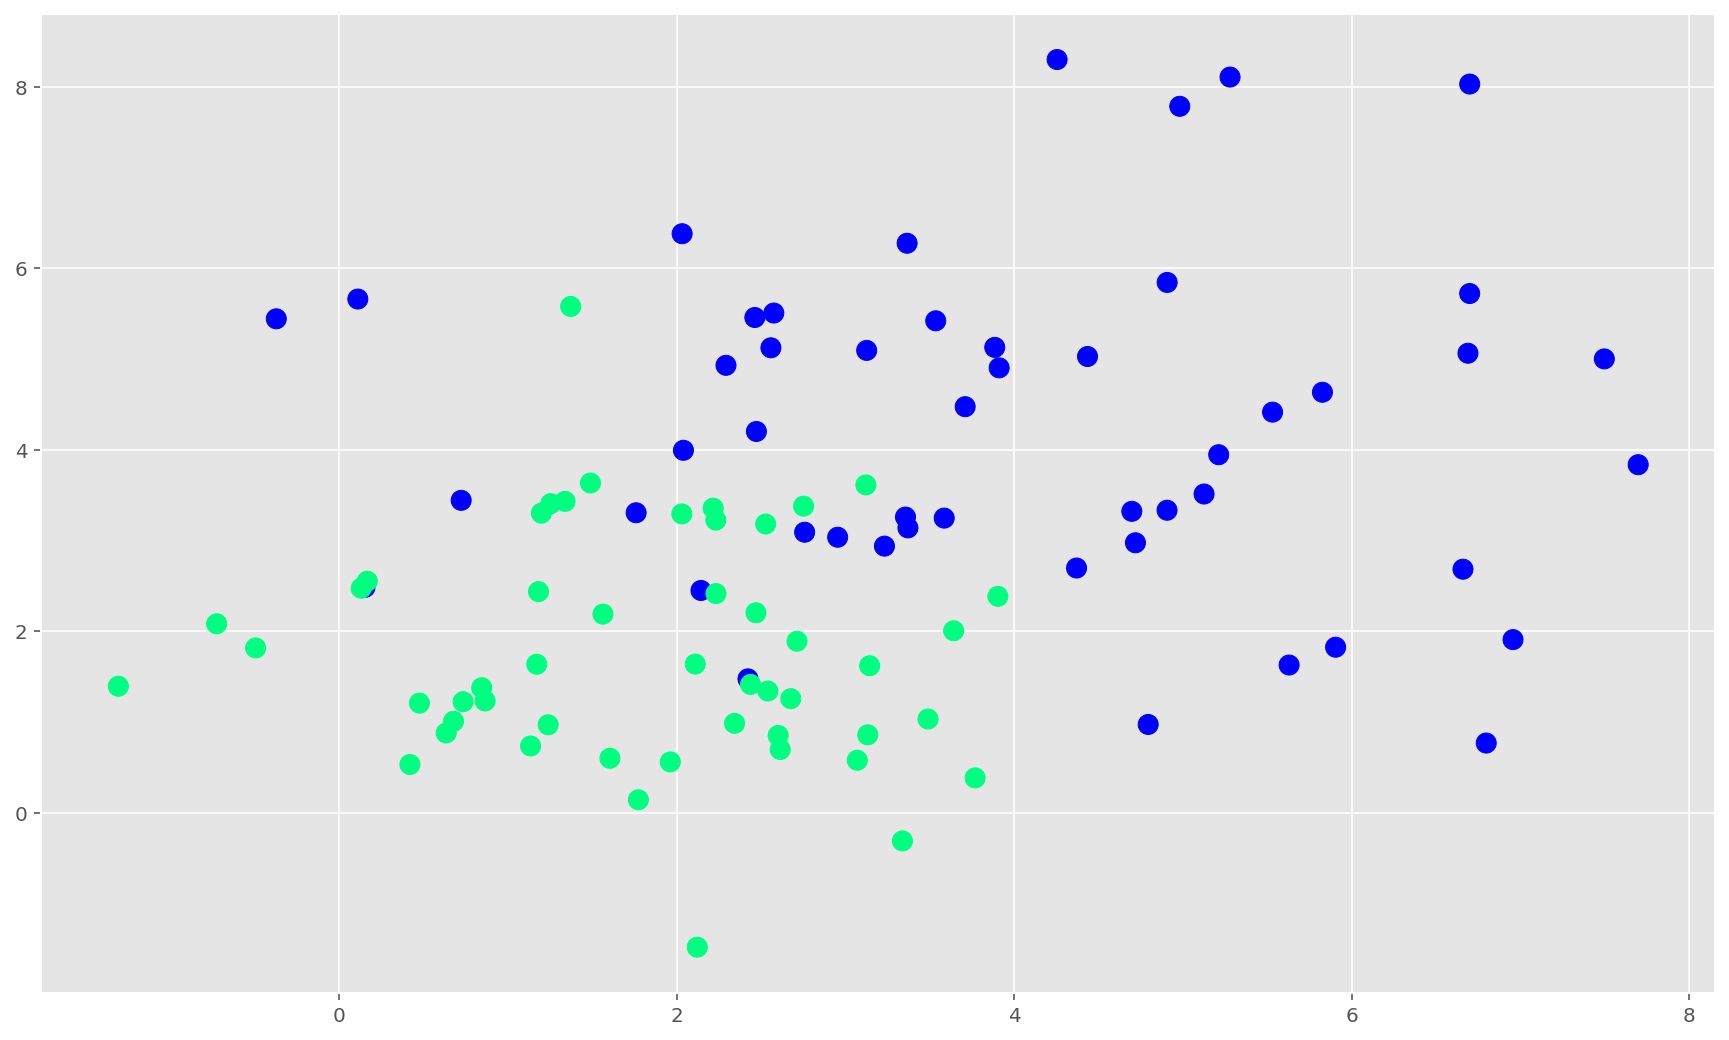

In [3]:
np.random.seed(13) # фиксируем какую-то одну случайную выборку
class0 = np.random.normal(4, 2, size=(50, 2))
class1 = np.random.normal(2, 1.5, size=(50, 2))
data = np.vstack((class0, class1))
target = np.hstack((np.zeros(len(class0)), np.ones(len(class1)))).astype(int)
plt.scatter(data[:, 0], data[:, 1], c=target, s=100, cmap='winter')
plt.show()

In [4]:
!pip install mlxtend

In [4]:
from sklearn.metrics import accuracy_score # импортируем оценку accuracy нашего алгоритма
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(data, target) # fit позволяет обучать модель data - x, target - y

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [5]:
knn.fit(data, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [6]:
knn.predict(data) # делаем предсказание

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [7]:
accuracy_score(target, knn.predict(data)) # получаем нашу точность

0.91

In [8]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

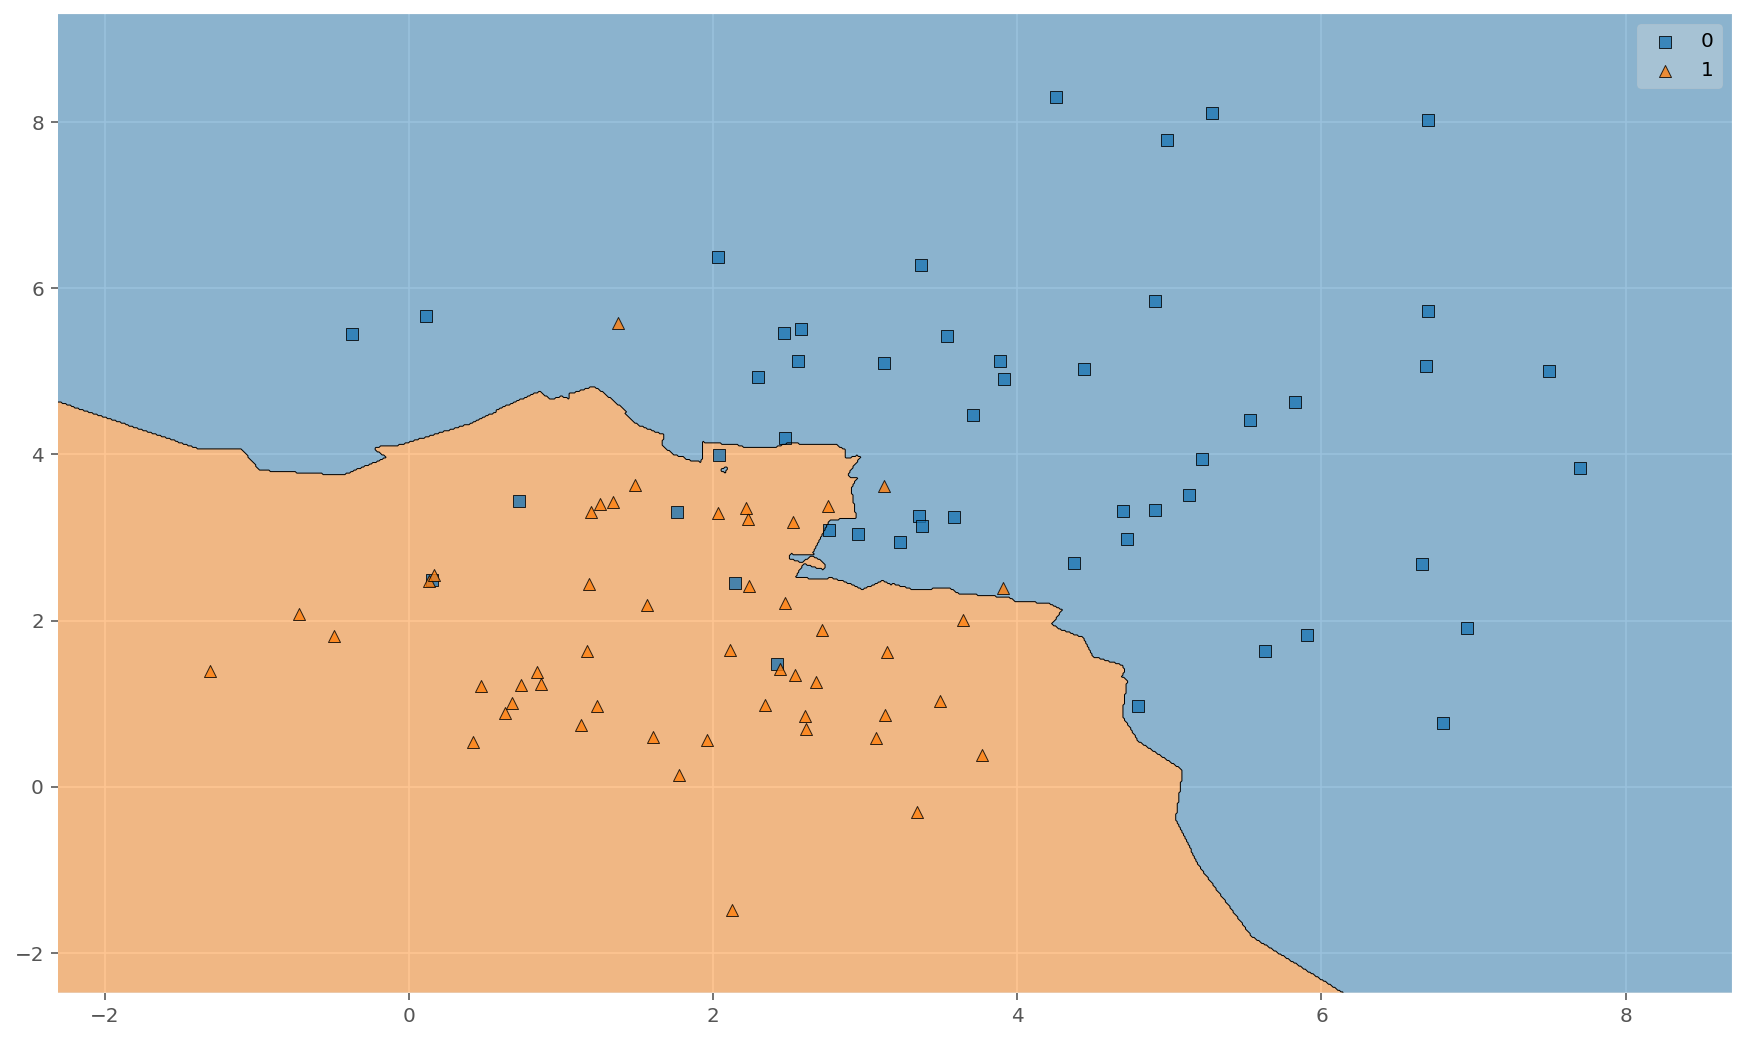

In [9]:
from mlxtend.plotting import plot_decision_regions # рисует области между разными классами
plot_decision_regions(X=data, y=target, clf=knn)
plt.show()

Попробуем поменять параметр `n_neighbors` у классификатора kNN. Что получается, когда соседей очень мало? Когда очень много? Как меняется граница между классами?

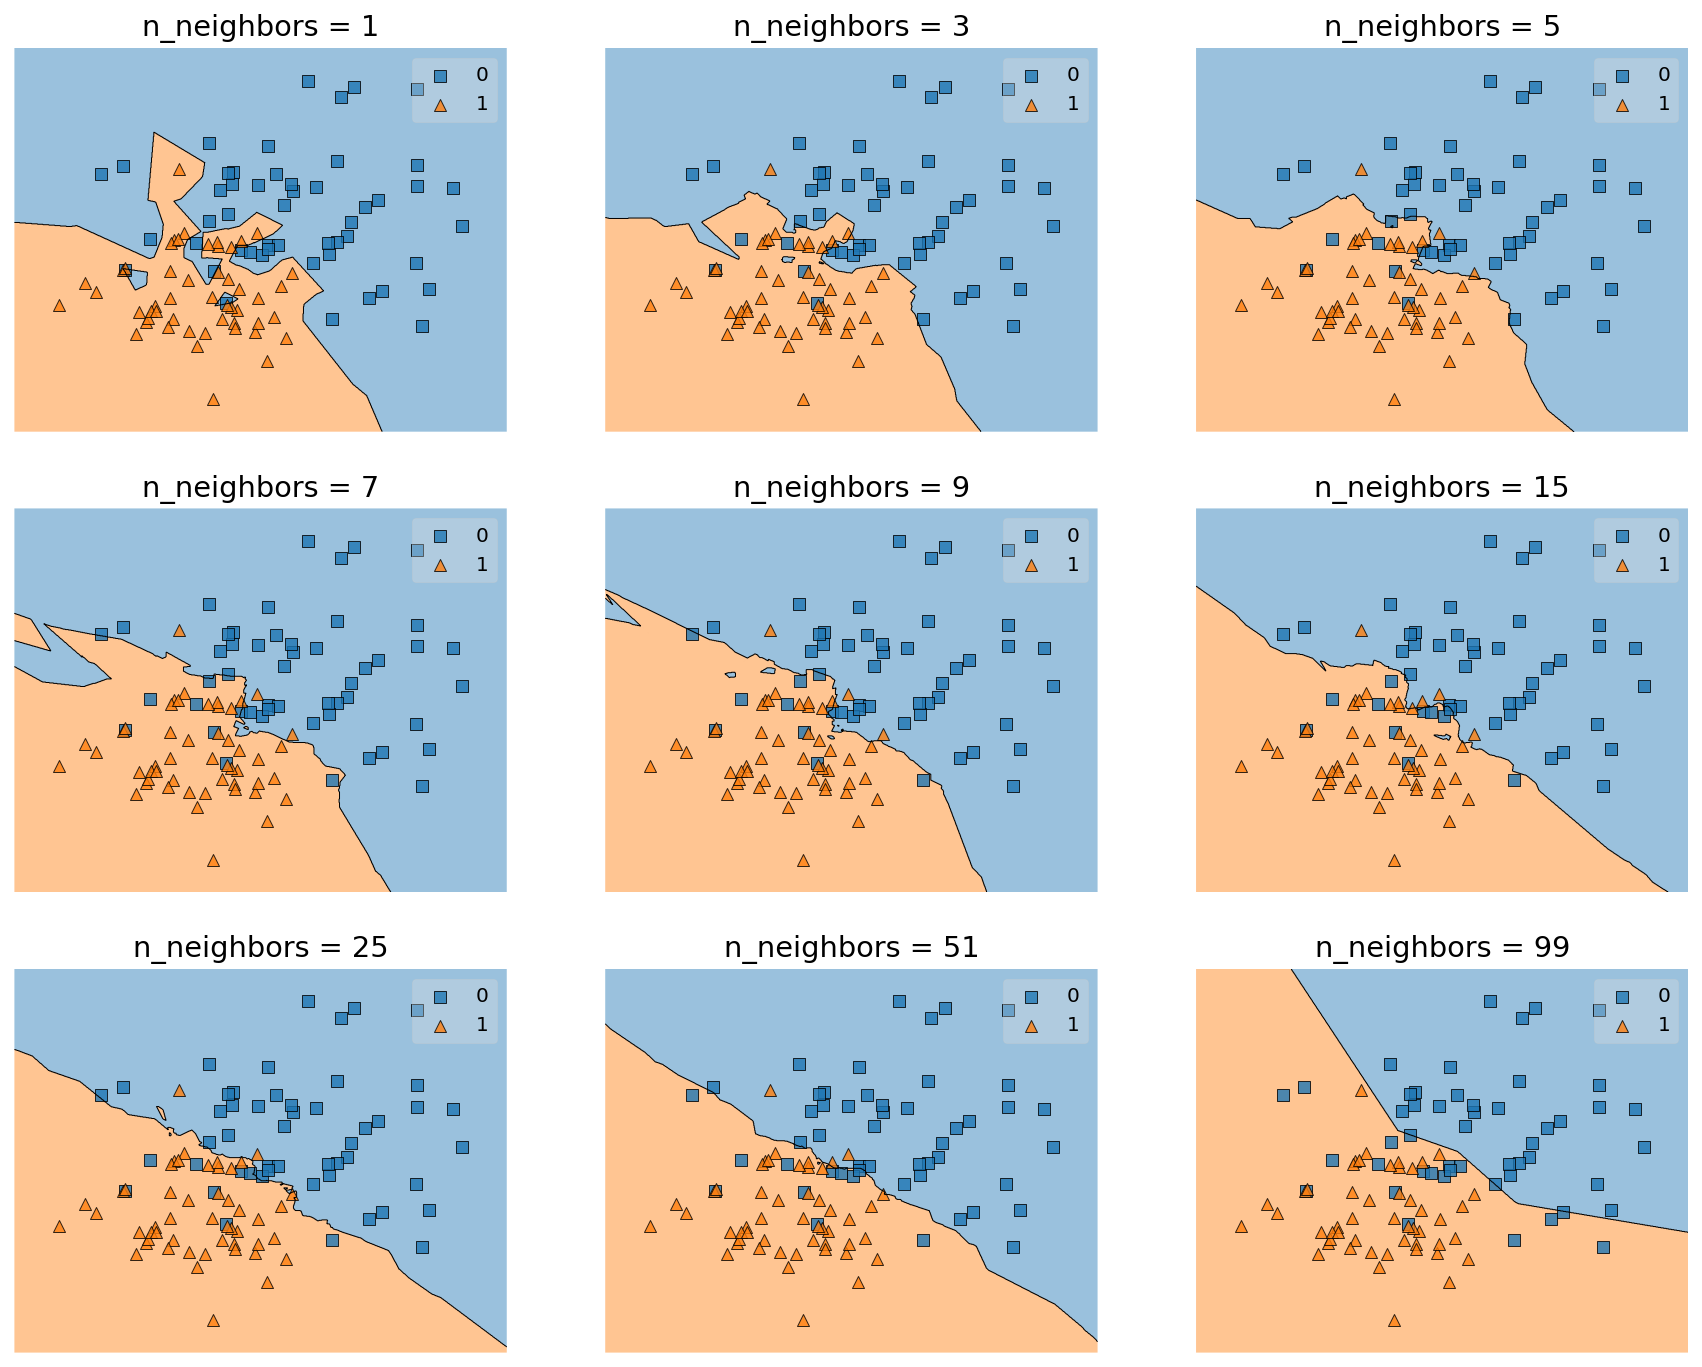

CPU times: user 3min 45s, sys: 9.23 s, total: 3min 54s
Wall time: 4min 16s


In [10]:
%%time

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, n_neighbors in enumerate([1, 3, 5, 7, 9, 15, 25, 51, 99]):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(data, target)
    ax_curr = ax[i // 3, i % 3]
    ax_curr.set_title('n_neighbors = {}'.format(n_neighbors))
    ax_curr.axis('off')
    plot_decision_regions(X=data, y=target, clf=knn, ax=ax_curr)
plt.show()

*Что произойдет, если выборка несбалансирована, а значение `n_neighors` равно числу объектов выборки?* (Будет выдавать тот класс, которого больше всего в выборке)

## Практика

Перейдем к применению kNN на практике с помощью библиотеки scikit-learn. Эта библиотека включает в себя множество алгоритмов, несколько тестовых наборов данных, функции для подсчета метрик и подбора параметров.

---

Scikit-learn появился как проект David Cournapeau на Google Summer of Code. Позднее к проекту присоединились другие разработчики, и первый релиз библиотеки состоялся 1 февраля 2010 года. Она быстро стала популярной засчет большого количества алгоритмов и простоты использования. Библиотека sklearn полезна для экспериментов, написания быстрых прототипов, участия в соревнованиях по анализу данных и во множестве других приложений. В тоже время, для промышленных проектов она может не подходить ввиду неоптимизированного кода и выбранного языка.

Рассмотрим стандартный датасет c помощью функции `load_boston`. Датасет содержит информацию о ценах на квартиры и какие-то параметры квартиры: близость к реке, криминогенная обстановка в районе и т.д.

In [11]:
import pandas as pd
from sklearn.datasets import load_boston

In [12]:
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [13]:
print(data['DESCR']) # описание датасета

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

In [15]:
X.shape, y.shape

((506, 13), (506,))

In [16]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Посмотрим на наши данные. Давайте построим  график того, как цена зависит цена от криминогенной обстановки.

Text(0, 0.5, 'Price')

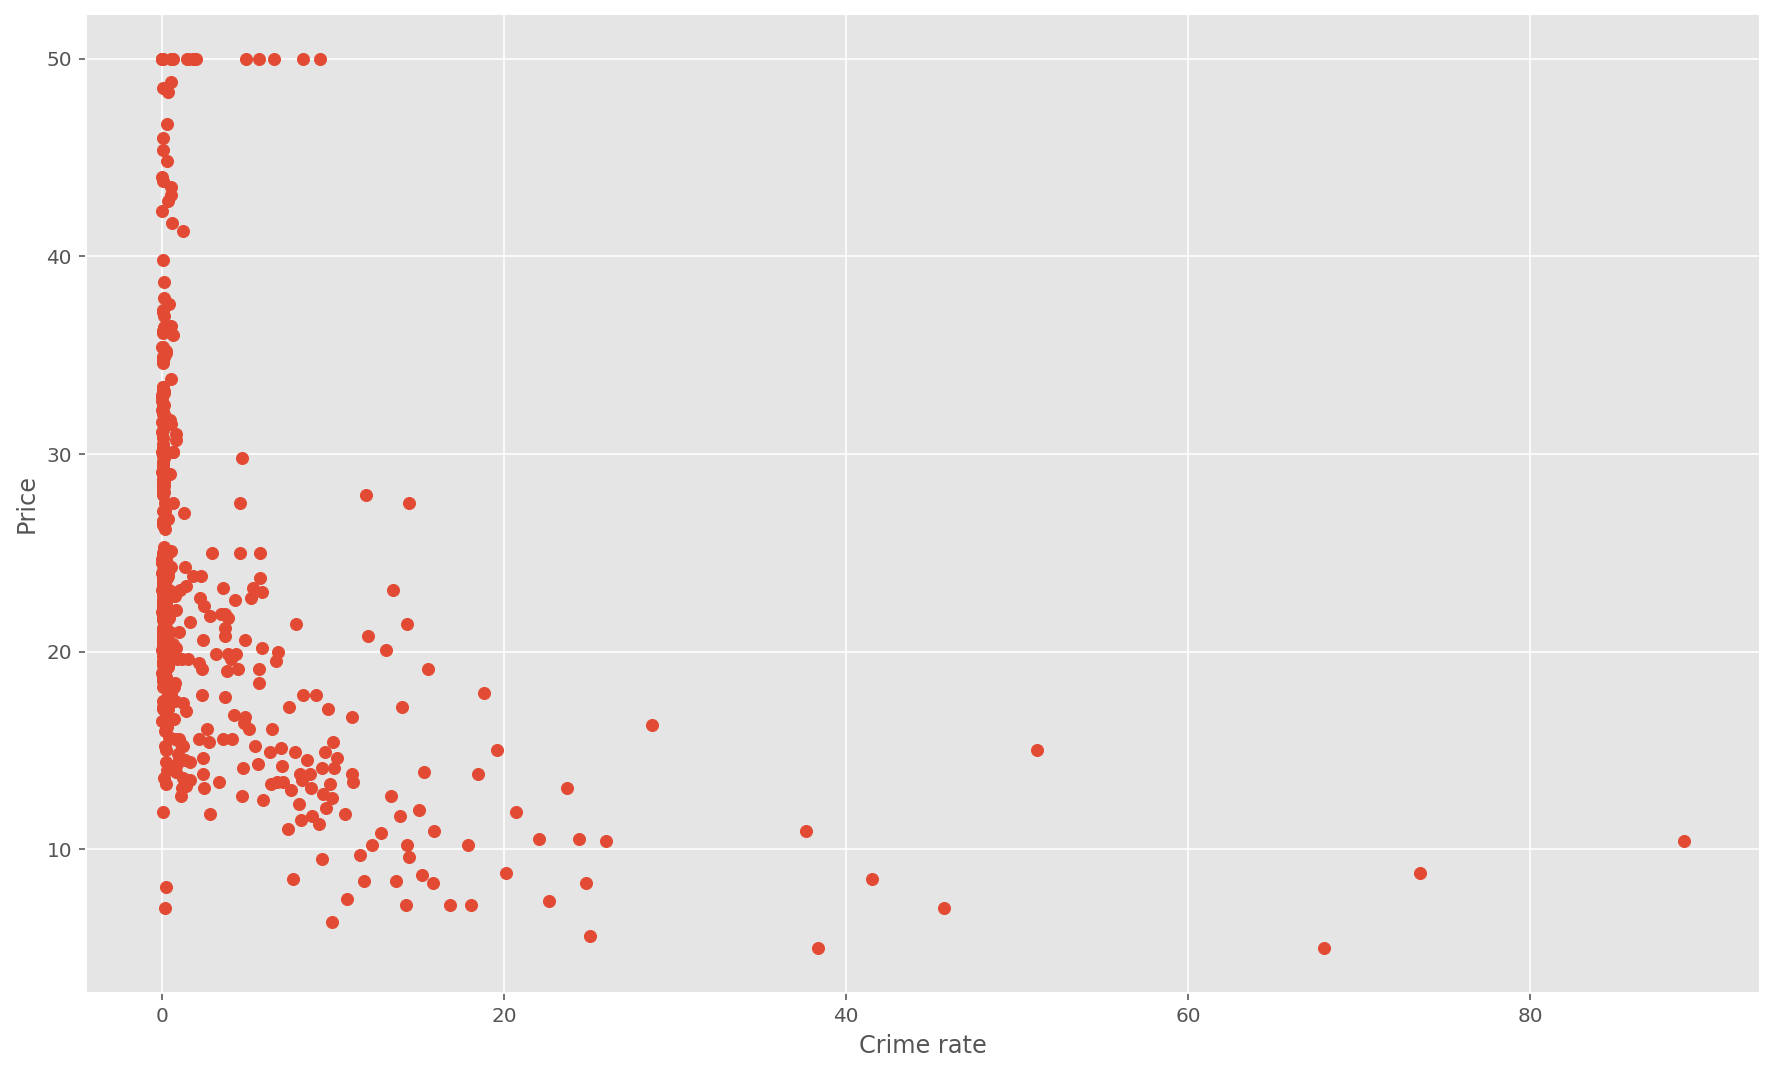

In [17]:
plt.scatter(X['CRIM'], y)
plt.xlabel('Crime rate')
plt.ylabel('Price')

Как мы видим, дорогие квартиры находятся в районах с низким уровнем преступности. Что, в принципе, закономерно.

In [18]:
from sklearn.model_selection import train_test_split # позволяет разбирть выборку на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13) # random_state фиксирует 
# значения, которые идут в train и test, все время

In [19]:
from sklearn.neighbors import KNeighborsRegressor

Импортируем алгоритм knn из sklearn. Работа с алгоритмами машинного обучения в библиотеке состоит из трех этапов.



1.   Создание объекта, который будет реализовывать алгоритм.
2.   Вызов `fit`: обучение модели на тренировочной подвыборке
3.   Вызов `predict`: получение предсказаний на тестовой выборке



In [20]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')

In [21]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [22]:
predictions = knn.predict(X_test)
predictions

array([22.94, 32.24, 24.14, 21.56, 20.18, 22.64, 24.06, 16.98, 29.7 ,
       10.86, 21.62, 16.72, 41.78, 16.5 , 14.7 , 11.5 , 12.24, 26.62,
       32.24, 17.76, 30.48, 24.72, 23.58, 18.9 , 15.56, 16.9 , 18.74,
       21.76, 22.94, 24.64, 28.  ,  9.92, 13.3 , 28.08, 21.62, 12.12,
       14.56, 17.66, 24.36, 14.48, 32.84, 19.92, 33.5 , 11.66, 17.76,
       22.2 , 21.64, 15.84, 26.44, 22.1 , 41.78, 30.78, 32.8 , 21.22,
       13.3 , 32.84, 21.22, 32.84, 27.64, 16.54, 22.5 , 15.74, 29.78,
       20.42, 25.98, 22.74, 33.88, 13.3 , 13.3 , 14.9 , 19.62, 21.6 ,
       21.22, 20.74, 45.58, 17.76, 21.66, 42.08, 30.36, 22.64, 22.48,
       19.78, 28.88, 13.3 , 35.72, 22.58, 28.72, 11.86, 35.  , 12.56,
       34.8 , 15.4 ,  9.86, 18.9 , 31.92, 21.5 , 23.58, 19.6 , 25.54,
       22.04, 19.92, 24.68])

Отлично! Мы получили предсказания. Посчитаем метрику - соответствующая функция есть в scikit-learn. Будем считать среднеквадратичную ошибку, так как мы решаем задачу регрессии.

In [23]:
from sklearn.metrics import mean_squared_error # за функционал ошибки берем MSE
mean_squared_error(y_test, predictions)

61.002850980392154

Давайте попробуем сделать лучше. У нашего алгоритма есть множество гиперпараметров: количество соседей, параметры метрики и веса. Запустим поиск по сетке гиперараметров, алгоритм переберет все возможные комбинации, посчитает метрику для каждого набора и выдаст лучший набор.

In [24]:
from sklearn.model_selection import GridSearchCV # нам надо найти гиперпараметры, которые будут лучше,
# через кросс-валидацию; cv - cross validation
grid_searcher = GridSearchCV(
    KNeighborsRegressor(),
    param_grid={
        'n_neighbors': range(1, 40, 2), # обычно для knn берутся нечетные значения, сравниваем их
        'weights': ['uniform', 'distance'], # сравниваем разные веса
        'p': [1, 2, 3] 
    },
    cv=5
)

Параметр `cv=5` говорит, что во время поиска оптимальных парамертов будет использоваться кросс-валидация с 5 фолдами. Давайте вспомним, что это такое: 

![alt text](https://miro.medium.com/max/700/1*rgba1BIOUys7wQcXcL4U5A.png)

*Source: https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85*

В нашем случае, выборка будет разделена на 5 частей, и на каждой из 5 итераций часть данных будет становиться тестовой выборкой, а другая часть - обучающей. Посчитав метрики на каждой итерации, мы сможем усреднить их в конце и получить достаточно точную оценку качества нашего алгоритма.

In [25]:
%%time

grid_searcher.fit(X_train, y_train);

CPU times: user 2.5 s, sys: 29.2 ms, total: 2.53 s
Wall time: 2.68 s


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Посмотрим на предсказание лучшей модели.

In [26]:
best_predictions = grid_searcher.predict(X_test)

In [27]:
best_predictions

array([20.00262119, 22.67694413, 17.97904688, 22.67300676, 21.03685448,
       21.16420488, 24.28704129, 14.90756173, 29.65054431, 10.57238081,
       21.55262672, 16.50295348, 43.47344623, 15.4430064 , 13.15723081,
       12.03743722, 10.10637354, 25.36993309, 34.87746879, 17.34601125,
       30.80883757, 24.91673446, 23.43525369, 15.53697256, 15.49717878,
       17.51748938, 25.5653014 , 22.1389749 , 15.24272491, 25.20448832,
       26.9646702 ,  9.91628407, 12.0607916 , 26.10341522, 21.9069761 ,
       10.38028386, 14.51668127, 17.64136667, 26.04886163, 13.2206457 ,
       32.86707005, 20.05070175, 36.85473955,  9.6370972 , 16.98937157,
       22.1038564 , 14.48090746, 16.17611929, 25.26006514, 20.36932733,
       40.31397299, 24.59774439, 39.85841863, 20.46206506, 13.08844557,
       32.82520699, 20.78889849, 32.07440182, 29.71083295, 18.39850287,
       21.94311646, 16.37092185, 29.03242561, 19.04919592, 20.41525304,
       23.09049448, 34.30632314, 13.73948762, 13.59678466, 14.95

In [28]:
mean_squared_error(y_test, best_predictions)

41.09086696843101

Давайте посмотрим на лучшие гиперпараметры, найденные по кросс-валидации.

In [29]:
grid_searcher.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

Давайте посмотрим на качество алгоритма в зависимости от количества соседей и от типа алгоритма (с разными весами и весами, обратно пропорциональными расстоянию). Качество будем оценивать с помощью кросс-валидации на обучающей выборке.

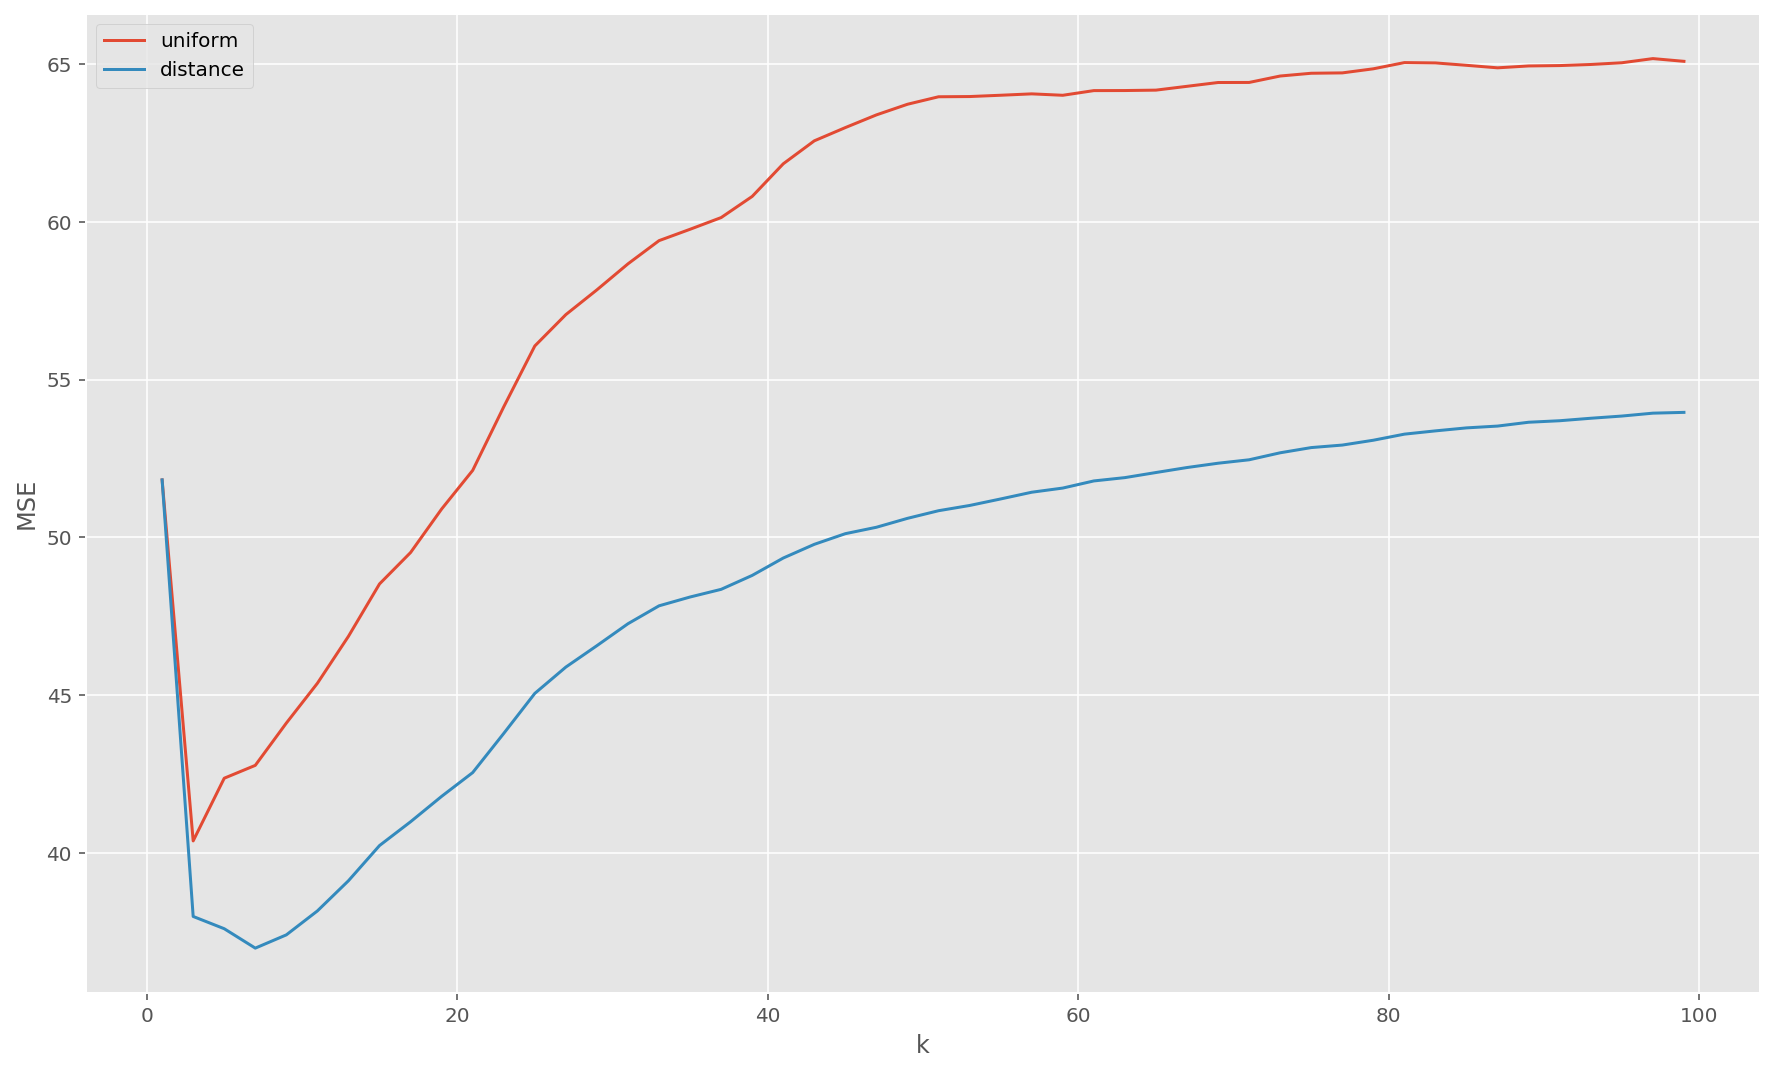

In [30]:
from sklearn.model_selection import cross_val_score

neighbors = np.arange(1, 101, 2)

scores_uni = []
scores_dis = []

for k in neighbors:
    knn_uniform = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knn_distance = KNeighborsRegressor(n_neighbors=k, weights='distance') # distance — 
    
    scores_uni.append(-cross_val_score(knn_uniform, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())
    scores_dis.append(-cross_val_score(knn_distance, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())

plt.plot(neighbors, scores_uni, label='uniform')
plt.plot(neighbors, scores_dis, label='distance')
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend()
plt.show()

Помимо готовых датасетов, в библиотеке sklearn можно найти функции для генерации искусственных данных. Давайте сгенерируем датасет для классификации и визуализируем его.

In [31]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.2) # можно еще добавить random_state

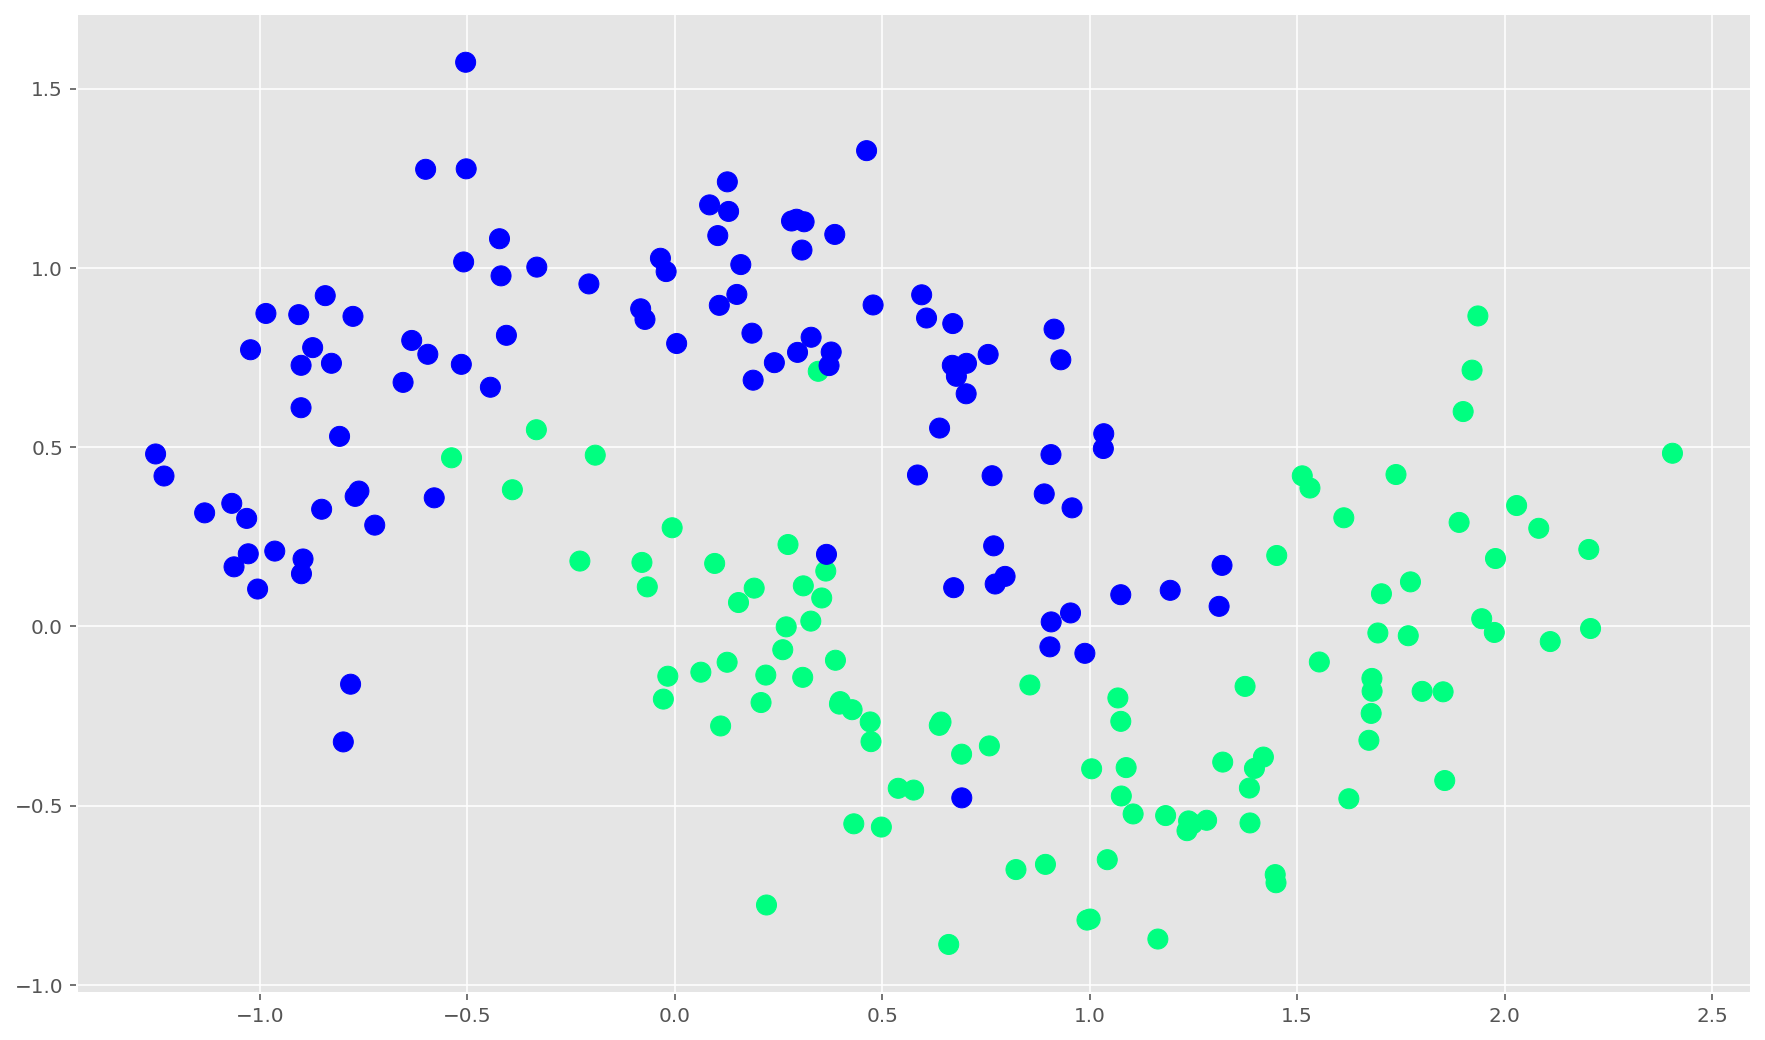

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='winter')
plt.show()

## Задания для самостоятельной работы.

1. https://nbviewer.jupyter.org/github/shestakoff/minor_da_2017/blob/master/colloc_knn.ipynb
2. Визуализируйте границу между классами для датасета `moons` для разного числа соседей и разных типов kNN (гиперпараметр `distance`). Как меняется граница в зависимости от числа соседей и типа алгоритма?
3. Влияет ли масштабирование на результат работы kNN? Примените два способа масштабирования к датасету `boston` - `MinMaxScaler` и `StandardScaler`. Как меняется качество алгоритма? Найдите оптимальные параметры.
(Да, будет влиять: та же логика как и в д/з #1)
`MinMaxScaler` — задает одинаковые границы:

$\dfrac{x - x_{min}}{x_{max} - x_{min}}$